In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12,8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [215]:
df=pd.read_csv('matches.csv')

In [216]:
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [217]:
df.shape

(816, 17)

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [219]:
df['eliminator'].value_counts()

N    799
Y     13
Name: eliminator, dtype: int64

umpire 1 and umpire 2 -drop
method ma nan is replaced by zero
date ma thi year extract karo and int ma convert karo
13 city missing drop it.
4 player of match drop
4 winner missing drop it.
result margin missing drop it


In [220]:
df.drop(['umpire1','umpire2'],inplace=True,axis=1)

In [221]:
df.dropna(subset=['city'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 803 entries, 0 to 815
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               803 non-null    int64  
 1   city             803 non-null    object 
 2   date             803 non-null    object 
 3   player_of_match  799 non-null    object 
 4   venue            803 non-null    object 
 5   neutral_venue    803 non-null    int64  
 6   team1            803 non-null    object 
 7   team2            803 non-null    object 
 8   toss_winner      803 non-null    object 
 9   toss_decision    803 non-null    object 
 10  winner           799 non-null    object 
 11  result           799 non-null    object 
 12  result_margin    786 non-null    float64
 13  eliminator       799 non-null    object 
 14  method           19 non-null     object 
dtypes: float64(1), int64(2), object(12)
memory usage: 100.4+ KB


In [222]:
df.dropna(subset=['player_of_match','winner','result','result_margin','eliminator'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786 entries, 0 to 815
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               786 non-null    int64  
 1   city             786 non-null    object 
 2   date             786 non-null    object 
 3   player_of_match  786 non-null    object 
 4   venue            786 non-null    object 
 5   neutral_venue    786 non-null    int64  
 6   team1            786 non-null    object 
 7   team2            786 non-null    object 
 8   toss_winner      786 non-null    object 
 9   toss_decision    786 non-null    object 
 10  winner           786 non-null    object 
 11  result           786 non-null    object 
 12  result_margin    786 non-null    float64
 13  eliminator       786 non-null    object 
 14  method           19 non-null     object 
dtypes: float64(1), int64(2), object(12)
memory usage: 98.2+ KB


In [223]:
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN


In [224]:
df['method']=df['method'].replace(np.NaN,0)

In [225]:
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,0
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,0
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,0
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,0
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,0


In [226]:
df['eliminator'].value_counts()

N    786
Name: eliminator, dtype: int64

In [227]:
df['method']=df['method'].replace('D/L',1)

In [228]:
df['method'].value_counts()

0    767
1     19
Name: method, dtype: int64

In [229]:
df['method'].value_counts()

0    767
1     19
Name: method, dtype: int64

In [230]:
# df.drop('id',inplace=True,axis=1)
df['eliminator'].value_counts()

N    786
Name: eliminator, dtype: int64

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786 entries, 0 to 815
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               786 non-null    int64  
 1   city             786 non-null    object 
 2   date             786 non-null    object 
 3   player_of_match  786 non-null    object 
 4   venue            786 non-null    object 
 5   neutral_venue    786 non-null    int64  
 6   team1            786 non-null    object 
 7   team2            786 non-null    object 
 8   toss_winner      786 non-null    object 
 9   toss_decision    786 non-null    object 
 10  winner           786 non-null    object 
 11  result           786 non-null    object 
 12  result_margin    786 non-null    float64
 13  eliminator       786 non-null    object 
 14  method           786 non-null    int64  
dtypes: float64(1), int64(3), object(11)
memory usage: 98.2+ KB


In [232]:
df.drop('venue',inplace=True,axis=1)
df.drop('neutral_venue',inplace=True,axis=1)

In [233]:
df['year'] = df['date'].str[:4]
df.drop('date',inplace=True,axis=1)
df.head()



,id,city,player_of_match,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,year
0,335982,Bangalore,BB McCullum,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,0,2008
1,335983,Chandigarh,MEK Hussey,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,0,2008
2,335984,Delhi,MF Maharoof,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,0,2008
3,335985,Mumbai,MV Boucher,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,0,2008
4,335986,Kolkata,DJ Hussey,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,0,2008


In [234]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786 entries, 0 to 815
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               786 non-null    int64  
 1   city             786 non-null    object 
 2   player_of_match  786 non-null    object 
 3   team1            786 non-null    object 
 4   team2            786 non-null    object 
 5   toss_winner      786 non-null    object 
 6   toss_decision    786 non-null    object 
 7   winner           786 non-null    object 
 8   result           786 non-null    object 
 9   result_margin    786 non-null    float64
 10  eliminator       786 non-null    object 
 11  method           786 non-null    int64  
 12  year             786 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 86.0+ KB


(786, 13)

In [235]:
df['team1'].replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace=True)
df['team2'].replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace=True)
df['toss_winner'].replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace=True)



In [236]:
df['team2'].value_counts()

Mumbai Indians                 101
Kolkata Knight Riders           95
Kings XI Punjab                 93
Rajasthan Royals                87
Royal Challengers Bangalore     84
Chennai Super Kings             82
Delhi Daredevils                74
Sunrisers Hyderabad             61
Deccan Chargers                 36
Pune Warriors                   22
Rising Pune Supergiants         16
Delhi Capitals                  14
Gujarat Lions                   14
Kochi Tuskers Kerala             7
Name: team2, dtype: int64

In [237]:
df.groupby('year').count()

,id,city,player_of_match,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method
year,,,,,,,,,,,,
2008,58,58,58,58,58,58,58,58,58,58,58,58
2009,56,56,56,56,56,56,56,56,56,56,56,56
2010,59,59,59,59,59,59,59,59,59,59,59,59
2011,72,72,72,72,72,72,72,72,72,72,72,72
2012,74,74,74,74,74,74,74,74,74,74,74,74
2013,74,74,74,74,74,74,74,74,74,74,74,74
2014,46,46,46,46,46,46,46,46,46,46,46,46
2015,56,56,56,56,56,56,56,56,56,56,56,56
2016,60,60,60,60,60,60,60,60,60,60,60,60


In [238]:
df.head()

,id,city,player_of_match,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,year
0,335982,Bangalore,BB McCullum,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,0,2008
1,335983,Chandigarh,MEK Hussey,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,0,2008
2,335984,Delhi,MF Maharoof,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,0,2008
3,335985,Mumbai,MV Boucher,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,0,2008
4,335986,Kolkata,DJ Hussey,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,0,2008


## TOSS Analysis

In [239]:
df['toss_decision'].value_counts()

field    477
bat      309
Name: toss_decision, dtype: int64

Team prefer to select field rather than batting. 60% field and 40% bat.

In [240]:
df[df['toss_winner']==df['winner']].count()

id                 403
city               403
player_of_match    403
team1              403
team2              403
toss_winner        403
toss_decision      403
winner             403
result             403
result_margin      403
eliminator         403
method             403
year               403
dtype: int64

out of 786 matches in 408 matches the team which won the toss also won the match.  to 51.9%.

In [241]:
m1=df['toss_decision']=='field'
m2=df['toss_winner']==df['winner']
df[m1 & m2].winner.count()

261

the team won the toss and decided to field(477) and out of which 266 won. ie.55.7% chance of winning.


In [242]:
m1=df['toss_decision']=='bat'
m2=df['toss_winner']==df['winner']
df[m1 & m2].winner.count()

142

the team won the toss and decided to bat(309) and out of which 142 won. ie.45.9% chance of winning. 


thus 1. toss decision: Field:60% and bat 40%
       Team selected field and 55.7%  they have won winning.
       Team  selected batting and 45% have won.
       
       But this numbers are near to 50. so there can be many other factors of wiining.
       captain can see this analysis and can plan accordingly.


The team which won the toss and also won the match. ie 51.9%. close to 50. so winning toss may not be so important.

In [243]:
t1=df['team1'].value_counts()
t2=df['team2'].value_counts()

In [244]:
match_played=t1+t2

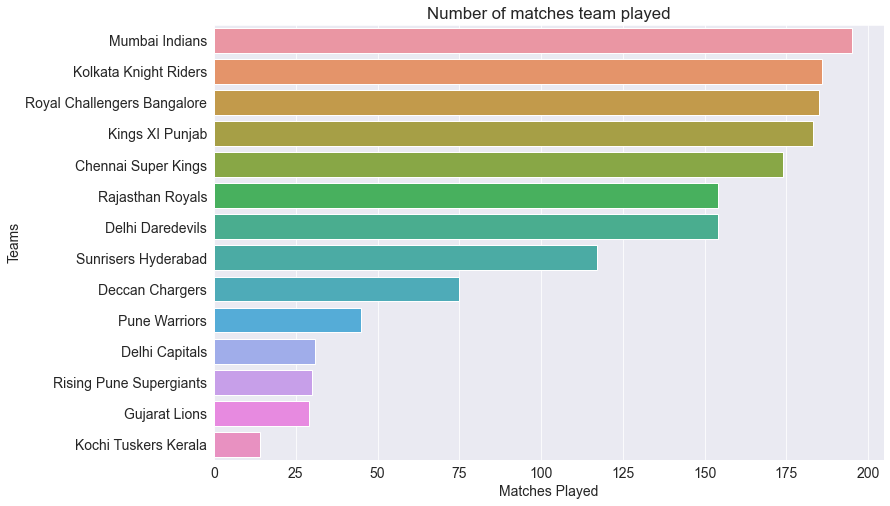

In [245]:
match_played.sort_values(ascending=False,inplace=True)
sns.barplot(y = match_played.index, x = match_played, orient='h').set(title="Number of matches team played",xlabel='Matches Played',ylabel='Teams');



In [246]:
df['team1'].value_counts().count()

14

14 teams have played in IPL from 2008 to 2020. 
MI has played maximum matches till data. 

In [247]:
df_year=df['year'].value_counts()

In [248]:
df_year.head(15)

2012    74
2013    74
2011    72
2018    60
2016    60
2010    59
2008    58
2017    58
2019    57
2015    56
2020    56
2009    56
2014    46
Name: year, dtype: int64

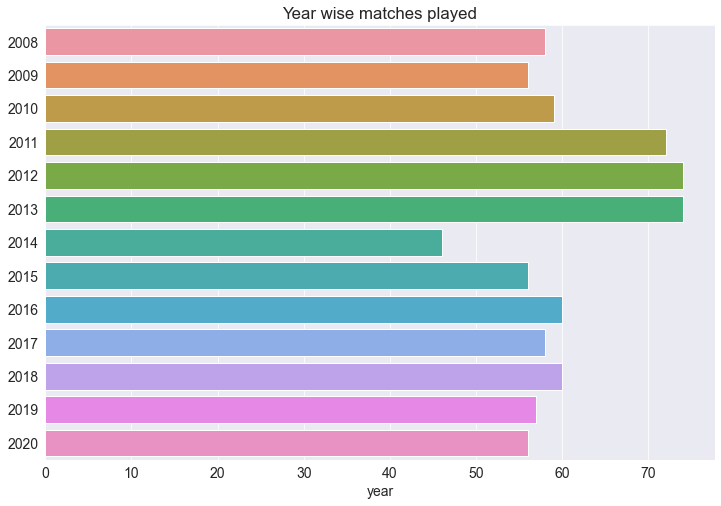

In [249]:
df_year.sort_index(ascending=True,inplace=True)
sns.barplot(y = df_year.index, x = df_year, orient='h').set(title="Year wise matches played");


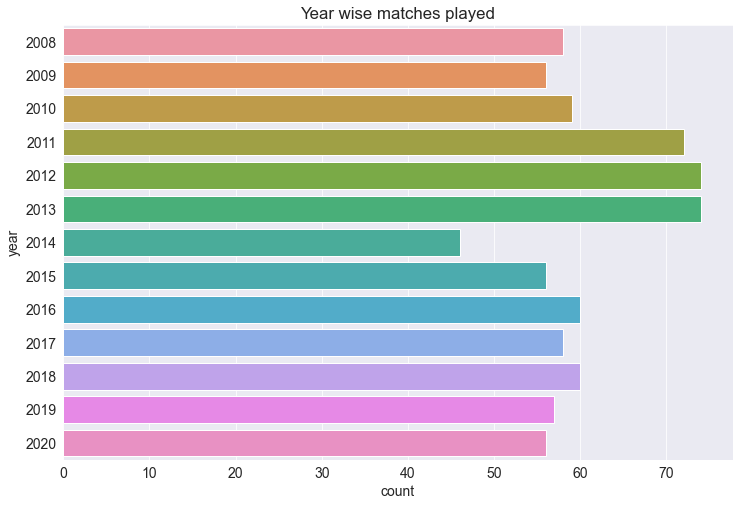

In [250]:
sns.countplot(y='year',data=df).set(title="Year wise matches played");

2008-2010  [55-60 matches]
2011-2013 [72-75]
2014 ...

In [251]:
df.groupby('year')['team1'].value_counts()

year  team1                
2008  Chennai Super Kings      9
      Deccan Chargers          7
      Delhi Daredevils         7
      Kings XI Punjab          7
      Kolkata Knight Riders    7
                              ..
2020  Mumbai Indians           8
      Kings XI Punjab          6
      Sunrisers Hyderabad      6
      Chennai Super Kings      4
      Rajasthan Royals         4
Name: team1, Length: 107, dtype: int64

Which team won maximum matches.(visual)

[Text(0.5, 0, 'Matches won'),
 Text(0, 0.5, 'Teams'),
 Text(0.5, 1.0, 'Matches won by various teams')]

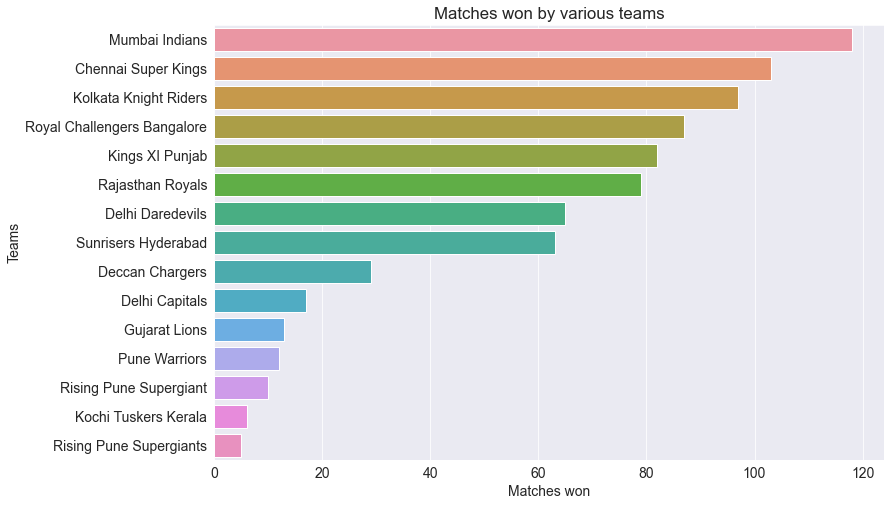

In [252]:
data = df.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h').set(xlabel='Matches won', ylabel='Teams',title='Matches won by various teams')

[Text(0.5, 0, 'count'),
 Text(0, 0.5, 'city'),
 Text(0.5, 1.0, 'Matches played in various cities')]

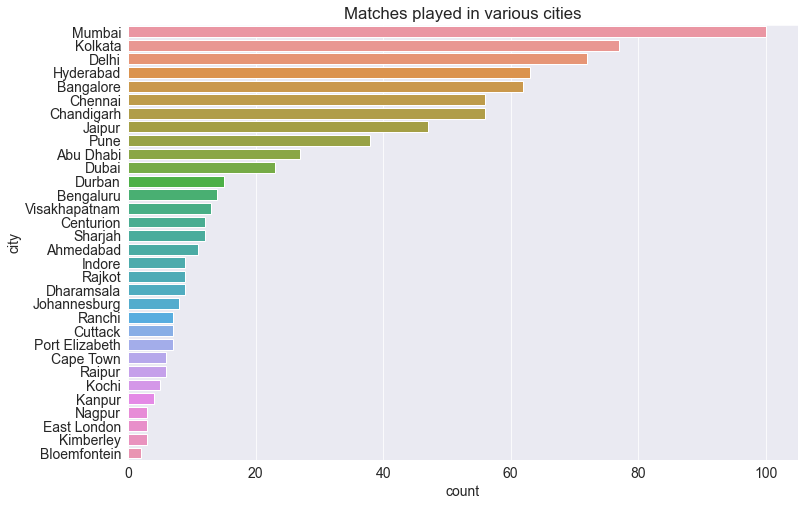

In [253]:
data1=df['city'].value_counts()
sns.barplot(y=data1.index,x=data1).set(xlabel='count', ylabel='city',title='Matches played in various cities')

[Text(0.5, 0, 'Toss Won'),
 Text(0, 0.5, 'Teams'),
 Text(0.5, 1.0, 'Toss won by various teams')]

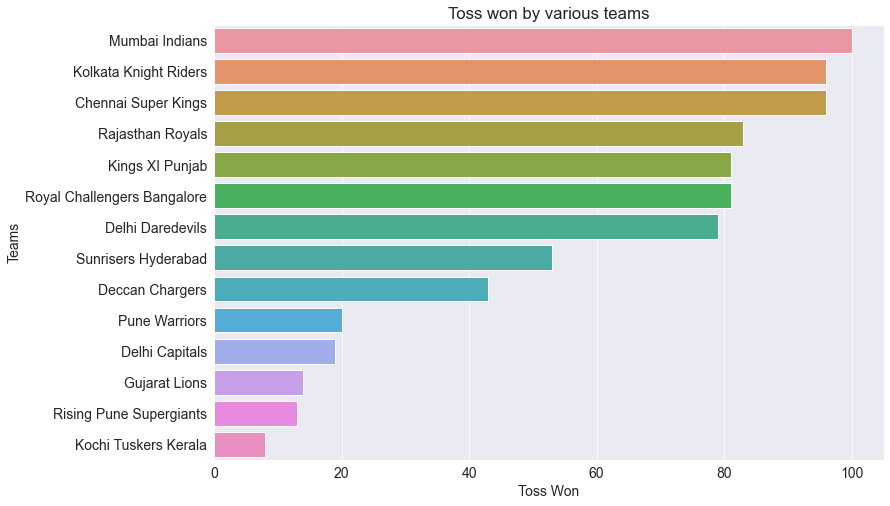

In [254]:
data2 = df.toss_winner.value_counts()
sns.barplot(y = data2.index, x = data2, orient='h').set(xlabel='Toss Won', ylabel='Teams',title='Toss won by various teams')

In [255]:
data1.shape

(32,)

In [256]:
data2.head(16)

Mumbai Indians                 100
Kolkata Knight Riders           96
Chennai Super Kings             96
Rajasthan Royals                83
Kings XI Punjab                 81
Royal Challengers Bangalore     81
Delhi Daredevils                79
Sunrisers Hyderabad             53
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  19
Gujarat Lions                   14
Rising Pune Supergiants         13
Kochi Tuskers Kerala             8
Name: toss_winner, dtype: int64

Player analysis

Text(0.5, 1.0, 'Margin of win (RUNS)')

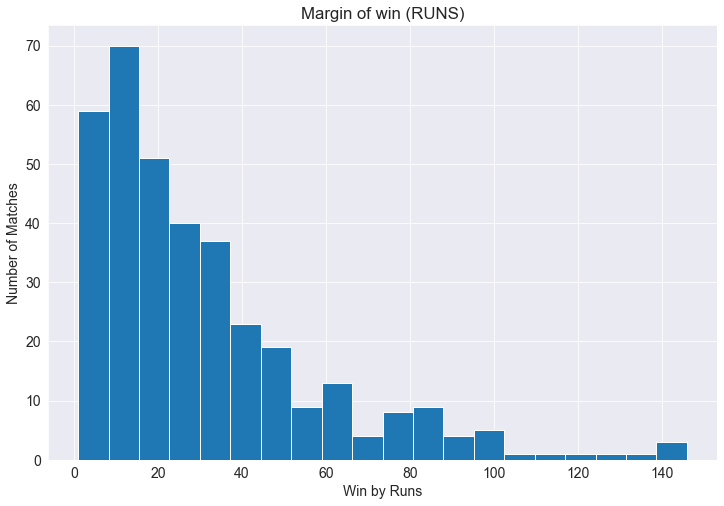

In [257]:
df1=df[df['result']=='runs']
plt.hist(df1['result_margin'],bins=20)
plt.xlabel('Win by Runs')
plt.ylabel('Number of Matches')
plt.title('Margin of win (RUNS)')

Text(0.5, 1.0, 'Top player of the match Winners')

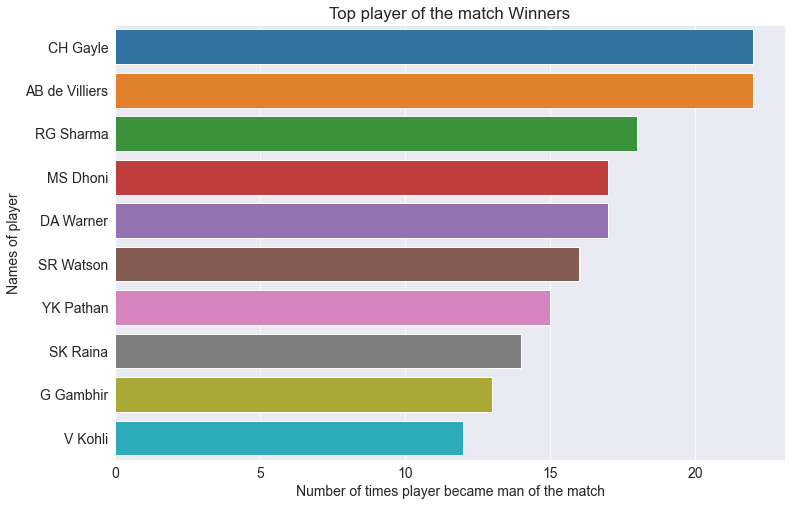

In [271]:
top_players = df.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,20])

# top_players.plot.bar()
sns.barplot(y = top_players.index, x = top_players, orient='h')
ax.set_xlabel("Number of times player became man of the match")
ax.set_ylabel("Names of player")
ax.set_title("Top player of the match Winners")

In [259]:
df1.head()

,id,city,player_of_match,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,year
0,335982,Bangalore,BB McCullum,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,0,2008
1,335983,Chandigarh,MEK Hussey,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,0,2008
7,335989,Chennai,ML Hayden,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,N,0,2008
9,335991,Chandigarh,KC Sangakkara,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,N,0,2008
14,335996,Bangalore,MS Dhoni,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,13.0,N,0,2008


Text(0.5, 1.0, 'Margin of win (WICKETS)')

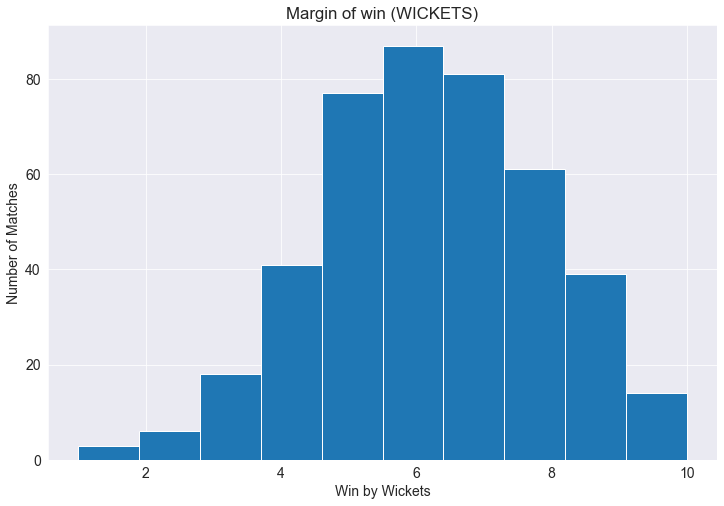

In [260]:
df1=df[df['result']=='wickets']
plt.hist(df1['result_margin'],bins=10)
plt.xlabel('Win by Wickets')
plt.ylabel('Number of Matches')
plt.title('Margin of win (WICKETS)')

In [261]:
df.head()

,id,city,player_of_match,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,year
0,335982,Bangalore,BB McCullum,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,0,2008
1,335983,Chandigarh,MEK Hussey,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,0,2008
2,335984,Delhi,MF Maharoof,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,0,2008
3,335985,Mumbai,MV Boucher,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,0,2008
4,335986,Kolkata,DJ Hussey,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,0,2008


In [262]:
df.shape

(786, 13)